In [29]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()

In [77]:
len(digits['data'])

1797

In [73]:
np.max(digits['data'][80])

16.0

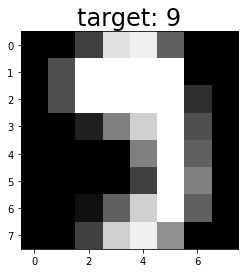

In [46]:
idx = np.random.randint(digits['data'].shape[0])
img = digits['data'][idx,:].reshape(8,8)

plt.imshow(img, cmap='gray')
plt.title(f"target: {digits['target'][idx]}", size=24)
plt.show()


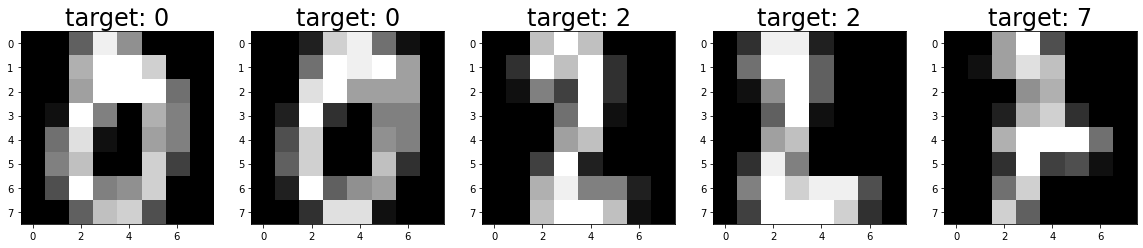

In [64]:
idx = np.random.randint(digits['data'].shape[0]-5)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits['data'][idx:idx+5], digits['target'][idx:idx+5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(image.reshape(8,8), cmap='gray')
  plt.title(f"target: {label}", size=24)
  #plt.show()

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], test_size=0.25, random_state=42)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [95]:
X_train[1], y_train[1]

(array([ 0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11.,
         0.,  0.,  0.,  0.,  8., 11.,  4., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 13.,  9.,  5.,  1.,  0.,  0.,  1., 11., 16.,
        16., 16., 10.,  0.,  0.,  5., 16., 14.,  8.,  6.,  1.,  0.]), 2)

In [96]:
X_test[1], y_test[1]

(array([ 0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 11., 13.,
         9.,  0.,  0.,  0.,  7., 16.,  0.,  9., 16.,  0.,  0.,  0.,  2.,
        15., 12., 16., 16.,  3.,  0.,  0.,  0.,  5.,  7.,  7., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  3.,  7.,
        16., 11.,  0.,  0.,  0.,  0., 13., 16., 11.,  1.,  0.,  0.]), 9)

### ONE HOT ENCODER

_ -> [0,1,2,3,4,5,6,7,8,9]
0 -> [1,0,0,0,0,0,0,0,0,0]
1 -> [0,1,0,0,0,0,0,0,0,0]
2 -> [0,0,1,0,0,0,0,0,0,0]
9 -> [0,0,0,0,0,0,0,0,0,1]

[0.1,0.1,0.7,0,0,0,0,0,0.1]

In [78]:
from sklearn.linear_model import LogisticRegression

In [90]:
model = LogisticRegression(solver='lbfgs',max_iter=100)

In [91]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
model.coef_.shape

(10, 64)

In [107]:
model.intercept_.shape

(10,)

In [105]:
model.n_iter_

array([1919], dtype=int32)

In [109]:
X_test[0], y_test[0]

(array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
         0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.]), 6)

In [113]:
X_test[0].reshape(1,-1).shape

(1, 64)

In [114]:
model.predict(X_test[0].reshape(1,-1))

array([6])

In [116]:
X_test[:10].shape

(10, 64)

In [121]:
model.predict(X_test[:20])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8])

In [120]:
y_test[:20]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8])

In [122]:
score = model.score(X_test, y_test)
score

0.9733333333333334

In [123]:
from sklearn.metrics import confusion_matrix

In [125]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [126]:
import seaborn as sns

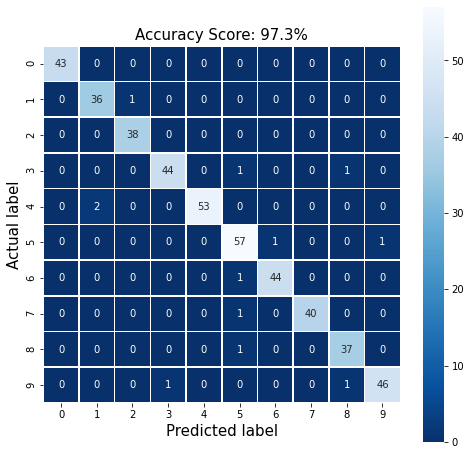

In [133]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score: {np.round(100*score,1)}%', size = 15)
plt.show()

In [135]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [137]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [138]:
mnist['data'].shape

(70000, 784)

In [139]:
mnist['target'].shape

(70000,)

In [143]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist['data'], mnist['target'], test_size=0.2, random_state=0)

In [145]:
train_lbl.shape

(56000,)

In [146]:
test_lbl.shape

(14000,)

In [147]:
train_img.shape

(56000, 784)

In [148]:
test_img.shape

(14000, 784)